# Les images vectorielles (cours 2023)

Nous allons apprendre maintenant les bases du dessin vectoriel. Nous le ferons avec une bibliothèque nommée `svg.py` mais il en existe plusieurs autres. `pygame` et `pillow` ont aussi des directives de dessin vectoriel, mais ces directives font le rendu sans possibilité ensuite de bénéficier des avantages du stockage vectoriel de l'image. Toutefois, cela permet de faire un certain nombre de formes simples (cadres, traits, texte) qui sont utile à un traitement global des images.

Les images vectorielles sont des images qui sont stockées sous forme d'une description mathématique. Cette description mathématique utilise un système de coordonnées, et des attributs liées aux formes tracées.

Le dessin vectoriel se retrouve dans un certain nombre de formats bien connus : SVG, PDF, Illustrator, Postscript (ce dernier étant lui un langage de programmation complet, dont l'interpréteur se retrouve dans la plupart des imprimantes).

In [1]:
!pip install -q jupyter colormath svg.py

In [2]:
import svg
from colormath.color_objects import sRGBColor, HSVColor
from colormath.color_conversions import convert_color
from IPython.display import HTML, SVG
import math

## Exemple simple
On va commencer par créer un cercle rouge. Cela permet de se familiariser avec des éléments que vous devrez repérer à la fois dans le code et dans le fichier résultat: une forme basique est définie par sa nature (ici, un cercle), des attributs qui permettent d'en faire une description précise (par exemple, des coordonnées de points intéressants, des distances...). L'image elle-même est définie par sa taille. L'unité est arbitraire, puisque la formule mathématique permet l'agrandissement et la réduction sans perte d'information.

In [3]:
import svg
canvas = svg.SVG(
    width=60,
    height=60,
    elements=[
        svg.Circle(
            cx=30, cy=30, r=20,
            stroke="red",
            fill="white",
            stroke_width=5,
        ),
    ],
)
print(canvas)


<svg xmlns="http://www.w3.org/2000/svg" width="60" height="60"><circle stroke="red" stroke-width="5" cx="30" cy="30" r="20" fill="white"/></svg>


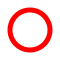

In [4]:
SVG(canvas.as_str())

On peut ajouter des éléments et construire le modèle au fur et à mesure, au besoin en calculant des éléments de façon manuelle. Par exemple, si on veut faire une sorte de logo rappelant les jeux olympiques:

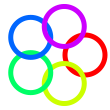

In [5]:
elements = []
circles=5
for x in range(0,circles):
    angle_degres = x*360/circles
    angle = math.radians(angle_degres)
    color=convert_color(HSVColor(angle_degres,1,1),sRGBColor)
    elements.append(
        svg.Circle(cx=55+30*math.cos(angle),
                   cy=55+30*math.sin(angle),
                   r=20,
                   stroke=f"{color.get_rgb_hex()}",
                   stroke_width=5,
                   fill="none"
                  )
    )
canvas = svg.SVG(
    width=110,
    height=110,
    elements=elements
)
SVG(canvas.as_str())

Note : Le symbole des jeux olympiques est plus compliqué à fabriquer, parce que chaque anneau est à la fois au-dessus à certains endroits, et en-dessous à d'autres. Sans tenir compte de cette difficulté, modifiez le programme précédent pour construire une rosace avec les bonnes couleurs 

**Exercice:** Reproduisez le dessin ci-dessous aux couleurs des JO. [Voici un exemple de fichier](https://upload.wikimedia.org/wikipedia/commons/a/a7/Olympic_flag.svg) dont vous pouvez regarder le code source.


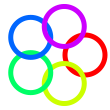

In [6]:
# votre solution
SVG(canvas.as_str())

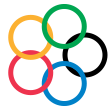

In [7]:
# Une solution possible

elements = []
circles=["#000","#0081C8","#EE334E","#FCB131","#00a651"]
for index,color_html in enumerate(circles):
    angle_degres = index*360/len(circles)
    angle = math.radians(angle_degres)
    elements.append(
        svg.Circle(cx=55+30*math.cos(angle),
                   cy=55+30*math.sin(angle),
                   r=20,
                   stroke=f"{color_html}",
                   stroke_width=5,
                   fill="none"
                  )
    )
canvas = svg.SVG(
    width=110,
    height=110,
    elements=elements
)
SVG(canvas.as_str())

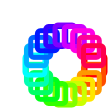

In [8]:
elements = []
squares=20
for x in range(0,squares):
    angle_degres = x*360/squares
    angle = math.radians(angle_degres)
    color=convert_color(HSVColor(angle_degres,1,1),sRGBColor)
    elements.append(
        svg.Rect(x=55+30*math.cos(angle),
                 y=55+30*math.sin(angle),
                 rx=3,ry=3,
                 width=20,height=20,
                 stroke=f"{color.get_rgb_hex()}",
                 stroke_width=5,
                 fill="none"
                )
    )
canvas = svg.SVG(
    width=110,
    height=110,
    elements=elements
)
SVG(canvas.as_str())

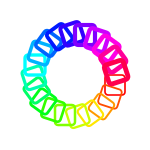

In [9]:
elements = []
squares=20
for x in range(0,squares):
    angle_degres = x*360/squares
    angle = math.radians(angle_degres)
    color=convert_color(HSVColor(angle_degres,1,1),sRGBColor)
    elements.append(
        svg.Rect(x=0,
                 y=0,
                 rx=3,ry=3,
                 width=20,height=20,
                 transform="translate({0},{1}) rotate({2})".format(75+30*math.cos(angle),75+30*math.sin(angle),angle_degres),
                 stroke=f"{color.get_rgb_hex()}",
                 stroke_width=5*(x+10)/(squares+10),
                 fill="none"
                )
    )
canvas = svg.SVG(
    width=150,
    height=150,
    elements=elements
)
SVG(canvas.as_str())

**Exercice :**
Faites un drapeau tricolore de votre choix, horizontal ou vertical. Le format habituel pour les drapeaux est un rapport de 3/2 entre largeur et hauteur.


In [10]:
# TODO

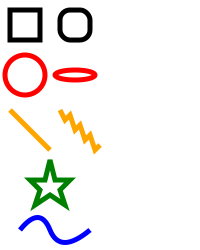

In [11]:
# All shapes
elements=[
    svg.Rect(
        x=10, y=10,
        width=30, height=30,
        stroke="black",
        fill="transparent",
        stroke_width=5,
    ),
    svg.Rect(
        x=60, y=10,
        rx=10, ry=10,
        width=30, height=30,
        stroke="black",
        fill="transparent",
        stroke_width=5,
    ),
    svg.Circle(
        cx=25, cy=75, r=20,
        stroke="red",
        fill="transparent",
        stroke_width=5,
    ),
    svg.Ellipse(
        cx=75, cy=75,
        rx=20, ry=5,
        stroke="red",
        fill="transparent",
        stroke_width=5,
    ),
    svg.Line(
        x1=10, x2=50,
        y1=110, y2=150,
        stroke="orange",
        stroke_width=5,
    ),
    svg.Polyline(
        points=[         
            60, 110, 65, 120, 70, 115, 75, 130, 80,
            125, 85, 140, 90, 135, 95, 150, 100, 145,
        ],
        stroke="orange",
        fill="transparent",
        stroke_width=5,
    ),
    svg.Polygon(
        points=[
            50, 160, 55, 180, 70, 180, 60, 190, 65, 205,
            50, 195, 35, 205, 40, 190, 30, 180, 45, 180,
        ],
        stroke="green",
        fill="transparent",
        stroke_width=5,
    ),
    svg.Path(
        d=[
            svg.M(20, 230),
            svg.Q(40, 205, 50, 230),
            svg.T(90, 230),
        ],
        fill="none",
        stroke="blue",
        stroke_width=5,
    )
]
canvas = svg.SVG(
    width=200,
    height=250,
    elements=elements
)
SVG(canvas.as_str())

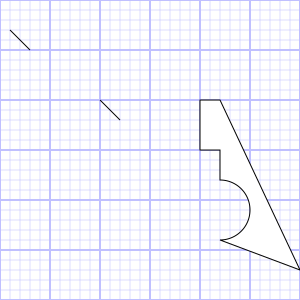

In [12]:
# Étude des chemins
elements = []
SIZE=30
F=10
PXSIZE=SIZE*F
for x in range(0,SIZE+1):
    elements.append(svg.Line(x1=x*F,x2=x*F,y1=0,y2=PXSIZE,stroke="#C0C0FF",stroke_width=(2 if x%5 ==0 else 0.5)))
    elements.append(svg.Line(y1=x*F,y2=x*F,x1=0,x2=PXSIZE,stroke="#C0C0FF",stroke_width=(2 if x%5 ==0 else 0.5)))

p=svg.Path(
    d=[
        svg.M(10,30), # Déplacement (coordonnées absolues)
        svg.L(30,50), # Ligne (depuis le dernier point, coordonnées absolues)
        svg.M(100,100),
        svg.l(20,20), # ligne (depuis le dernier point, coordonnnées relatives)
        svg.m(100,-20), # Déplacement (coordonnnées relatives)
        svg.H(200), # Déplacement horizontal (abcisse absolue)
        svg.V(150), # Déplacement vertical (ordonnée relative)
        svg.h(20),  # Déplacement horizontal (abcisse absolue)
        svg.v(30),  # Déplacement vertical (ordonnée relative)
        svg.a(30,30,180,False,True,0,60), # Arc de cercle : 
        svg.l(80,30),
        svg.Z()
    ],
    stroke_width=1,
    stroke="black",
    fill="white"
)
elements.append(p)
canvas = svg.SVG(
    width=SIZE*10,
    height=SIZE*10,
    elements=elements
)
SVG(canvas.as_str())

**Exercice :**
Faites un drapeau agrémenté d'un motif géométrique simple : croix, étoile à cinq ou six branches, cœur…


**Exercice :**
Faites un drapeau avec un motif répété : drapeau américain, drapeau européen, ou soleil (avec des rayons).

In [ ]:

p=svg.Path(
    d=[
        svg.M(10,10),
        svg.L(240,50),
        svg.L(150,100),
        svg.L(60,150), # Same vector
        svg.L(150,200),
        svg.M(10,10),
        svg.Q(240,50,150,100),
        svg.T(150,200),
    ],
    stroke_width=1,
    stroke="black",
    fill="none"
)


# Les transformations 


<svg xmlns="http://www.w3.org/2000/svg" width="100" height="100"><g transform="rotate(10 0 0) scale(0.5 0.5)"><rect stroke="red" stroke-width="5" x="30" y="20" width="40" height="60" fill="transparent"/></g><rect stroke="red" stroke-width="5" x="30" y="20" width="40" height="60" fill="transparent"/></svg>


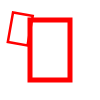

In [34]:
canvas = svg.SVG(
        width=100,
        height=100,
        elements=[
            svg.G(
                elements=[
                    svg.Rect(
                        x=30, y=20, height=60, width=40,
                        stroke="red",
                        fill="transparent",
                        stroke_width=5,
                    ),
                ],
                transform=[
                    svg.Rotate(10, 0, 0),
                    svg.Scale(.5,.5)
                ]
            ),
            svg.Rect(
                x=30, y=20, height=60, width=40,
                stroke="red",
                fill="transparent",
                stroke_width=5,
            ),
        ]
    )
print(canvas)
SVG(canvas.as_str())

<g ><g transform="scale(0.3333333333333333 0.3333333333333333)"><path stroke="black" stroke-width="10" d="M 0 0 L 100 0" stroke-linecap="round" fill="none"/></g><g transform="scale(0.3333333333333333 0.3333333333333333) translate(100 0) rotate(60 0 0)"><path stroke="black" stroke-width="10" d="M 0 0 L 100 0" stroke-linecap="round" fill="none"/></g><g transform="scale(0.3333333333333333 0.3333333333333333) translate(100 0) rotate(60 0 0) translate(100 0) rotate(-120 0 0)"><path stroke="black" stroke-width="10" d="M 0 0 L 100 0" stroke-linecap="round" fill="none"/></g><g transform="scale(0.3333333333333333 0.3333333333333333) translate(200 0)"><path stroke="black" stroke-width="10" d="M 0 0 L 100 0" stroke-linecap="round" fill="none"/></g></g>


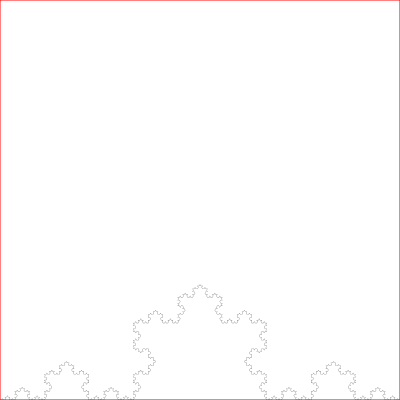

In [114]:
level=[]
level.append(
    svg.Path(
        d=[svg.M(0,0),svg.L(100,0)],
        stroke_width=10,           
        stroke_linecap="round",
        stroke="black",
        fill="none"
    )
)

max=6
for i in range(1,max):
    level.append(
        svg.G(
            elements=[
                svg.G(
                    elements=[level[i-1]],
                    transform=[
                        svg.Scale(1/3,1/3)
                    ]
                ),
                svg.G(
                    elements=[level[i-1]],
                    transform=[
                        svg.Scale(1/3,1/3),
                        svg.Translate(100,0),
                        svg.Rotate(60,0,0),
                    ]
                ),
                svg.G(
                    elements=[level[i-1]],
                    transform=[
                        svg.Scale(1/3,1/3),
                        svg.Translate(100,0),
                        svg.Rotate(60,0,0),
                        svg.Translate(100,0),
                        svg.Rotate(-120,0,0),
                    ]
                ),
                svg.G(
                    elements=[level[i-1]],
                    transform=[
                        svg.Scale(1/3,1/3),
                        svg.Translate(200,0),
                    ]
                ),
            ]
        )
    )
print(level[1])
LARGE=4
canvas = svg.SVG(
    width=LARGE*100,
    height=LARGE*100,
    elements=[
        svg.Rect(
            x=0, y=0, height=LARGE*100, width=LARGE*100,
            stroke="red",
            fill="transparent",
            stroke_width=1,
        ),
        svg.G(   
            elements=[level[max-1]],
            transform=[
                svg.Scale(LARGE),
                svg.Rotate(180,50,50),
            ]
        ),
    ]
)
SVG(canvas.as_str())

In [115]:
level=[]
level.append(
    svg.Path(
        d=[svg.M(0,0),svg.L(100,0)],
        stroke_width=10,
        stroke="black",  
        stroke_linecap="round",
        fill="none"
    )
)

max=8
for i in range(1,max):
    level.append(
        svg.G(
            elements=[
                svg.G(
                    elements=[level[0]],
                    transform=[
                        svg.Scale(1/2),
                        svg.Translate(100,0),
                    ]
                ),
                svg.G(
                    elements=[level[i-1]],
                    transform=[
                        svg.Scale(1/2),
                    ]
                ),
                svg.G(
                    elements=[level[i-1]],
                    transform=[
                        svg.Scale(1/2,1/2),
                        svg.Translate(100,0),
                        svg.Rotate(150,0,0),
                        svg.Translate(100,0),
                        svg.Rotate(180,0,0),
                    ]
                ),
                svg.G(
                    elements=[level[i-1]],
                    transform=[
                        svg.Scale(1/3,1/3),
                        svg.Translate(100,0),
                        svg.Rotate(225,0,0),
                        svg.Translate(100,0),
                        svg.Rotate(180,0,0),
                    ]
                ),
                svg.G(
                    elements=[level[i-1]],
                    transform=[
                        svg.Scale(1/5,1/5),
                        svg.Translate(200,0),
                        svg.Rotate(255,0,0),
                        svg.Translate(100,0),
                        svg.Rotate(180,0,0),
                    ]
                ),
            ]
        )
    )
LARGE=4
canvas = svg.SVG(
    width=LARGE*100,
    height=LARGE*100,
    elements=[
        svg.Rect(
            x=0, y=0, height=LARGE*100, width=LARGE*100,
            stroke="red",
            fill="transparent",
            stroke_width=1,
        ),
        svg.G(   
            elements=[level[max-1]],
            transform=[
                svg.Scale(LARGE),
                svg.Rotate(90,50,50),
                svg.Translate(0,50),
            ]
        ),
    ]
)
SVG(canvas.as_str())

**Exercice: **
Modifiez l'une des deux figures fractales ci-dessus pour voir comment les transformations agissent.

<g ><g transform="scale(0.3333333333333333 0.3333333333333333)"><g ><path stroke="black" stroke-width="10" d="M 0 0 L 100 0" stroke-linecap="round" fill="none"/></g></g><g transform="scale(0.3333333333333333 0.3333333333333333) translate(100 0) rotate(60 0 0)"><g ><path stroke="black" stroke-width="10" d="M 0 0 L 100 0" stroke-linecap="round" fill="none"/></g></g><g transform="scale(0.3333333333333333 0.3333333333333333) translate(100 0) rotate(60 0 0) translate(100 0) rotate(-120 0 0)"><g ><path stroke="black" stroke-width="10" d="M 0 0 L 100 0" stroke-linecap="round" fill="none"/></g></g><g transform="scale(0.3333333333333333 0.3333333333333333) translate(200 0)"><g ><path stroke="black" stroke-width="10" d="M 0 0 L 100 0" stroke-linecap="round" fill="none"/></g></g></g>


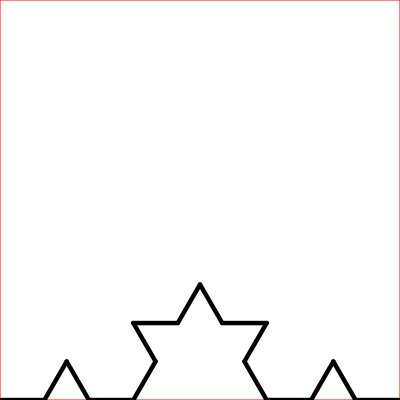

In [116]:
level=[]
level.append(
    svg.G(
        elements=[
            svg.Path(
                d=[svg.M(0,0),svg.L(100,0)],
                stroke_width=10,
                stroke="black",
                fill="none",
                stroke_linecap="round",
            ),
        ]
    )
)

max=3
for i in range(1,max):
    level.append(
        svg.G(
            elements=[
                svg.G(
                    elements=[level[i-1]],
                    transform=[
                        svg.Scale(1/3,1/3)
                    ]
                ),
                svg.G(
                    elements=[level[i-1]],
                    transform=[
                        svg.Scale(1/3,1/3),
                        svg.Translate(100,0),
                        svg.Rotate(60,0,0),
                    ]
                ),
                svg.G(
                    elements=[level[i-1]],
                    transform=[
                        svg.Scale(1/3,1/3),
                        svg.Translate(100,0),
                        svg.Rotate(60,0,0),
                        svg.Translate(100,0),
                        svg.Rotate(-120,0,0),
                    ]
                ),
                svg.G(
                    elements=[level[i-1]],
                    transform=[
                        svg.Scale(1/3,1/3),
                        svg.Translate(200,0),
                    ]
                ),
            ]
        )
    )
print(level[1])
LARGE=4
canvas = svg.SVG(
    width=LARGE*100,
    height=LARGE*100,
    elements=[
        svg.Rect(
            x=0, y=0, height=LARGE*100, width=LARGE*100,
            stroke="red",
            fill="transparent",
            stroke_width=1,
        ),
        svg.G(   
            elements=[level[max-1]],
            transform=[
                svg.Scale(LARGE),
                svg.Rotate(180,50,50),
            ]
        ),
    ]
)
SVG(canvas.as_str())

### Les courbes

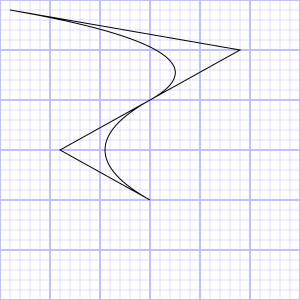

In [117]:
# Étude des chemins
# Quadratic curves (Q & T)
elements = []
SIZE=30
F=10
PXSIZE=SIZE*F
for x in range(0,SIZE+1):
    elements.append(svg.Line(x1=x*F,x2=x*F,y1=0,y2=PXSIZE,stroke="#C0C0FF",stroke_width=(2 if x%5 ==0 else 0.5)))
    elements.append(svg.Line(y1=x*F,y2=x*F,x1=0,x2=PXSIZE,stroke="#C0C0FF",stroke_width=(2 if x%5 ==0 else 0.5)))

p=svg.Path(
    d=[
        svg.M(10,10),
        svg.L(240,50),
        svg.L(150,100),
        svg.L(60,150), # Same vector
        svg.L(150,200),
        svg.M(10,10),
        svg.Q(240,50,150,100),
        svg.T(150,200),
    ],
    stroke_width=1,
    stroke="black",
    fill="none"
)
elements.append(p)
canvas = svg.SVG(
    width=SIZE*10,
    height=SIZE*10,
    elements=elements
)
SVG(canvas.as_str())

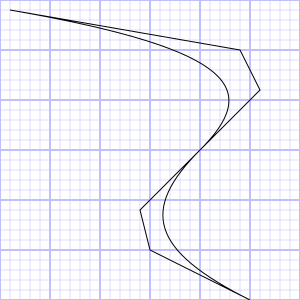

In [118]:
# Étude des chemins
# Cubic curves (C & S)
elements = []
SIZE=30
F=10
PXSIZE=SIZE*F
for x in range(0,SIZE+1):
    elements.append(svg.Line(x1=x*F,x2=x*F,y1=0,y2=PXSIZE,stroke="#C0C0FF",stroke_width=(2 if x%5 ==0 else 0.5)))
    elements.append(svg.Line(y1=x*F,y2=x*F,x1=0,x2=PXSIZE,stroke="#C0C0FF",stroke_width=(2 if x%5 ==0 else 0.5)))

p=svg.Path(
    d=[
        svg.M(10,10),
        svg.L(240,50),
        svg.L(260,90),
        svg.L(200,150),
        svg.L(140,210),
        svg.L(150,250),
        svg.L(250,300),
        svg.M(10,10),
        svg.C(240,50,260,90,200,150),
        svg.S(150,250,250,300)
    ],
    stroke_width=1,
    stroke="black",
    fill="none"
)
elements.append(p)
canvas = svg.SVG(
    width=SIZE*10,
    height=SIZE*10,
    elements=elements
)
SVG(canvas.as_str())

**Exercice :**
Faites un drapeau pirate de votre choix, en utilisant des courbes de Bézier (cubique ou quadratique). Vous pourrez utiliser du papier à carreaux.

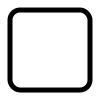

In [119]:
elements=[
    svg.Rect(
        x=10, y=10,
        rx=10, ry=10,
        width=80, height=80,
        stroke="black",
        fill="transparent",
        stroke_width=5,
        elements=[
            svg.Animate(
                attributeName="rx",
                values="0;50;0",
                dur="10s",
                repeatCount="indefinite"
            ),
             svg.Animate(
                attributeName="ry",
                values="50;0;50",
                dur="10s",
                repeatCount="indefinite"
            ),
            svg.Animate(
                attributeName="width",
                values="80;50;80",
                dur="30s",
                repeatCount="indefinite"
            ),

       ]
    )
]
canvas = svg.SVG(
    width=100,
    height=100,
    elements=elements
)
SVG(canvas.as_str())